In [1]:
"""
Analyze daughter particles for annihilation event
author: Jiancheng Zeng
Date: June 24, 2024
"""

'\nAnalyze daughter particles for annihilation event\nauthor: Jiancheng Zeng\nDate: July 12, 2023\n'

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import os
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis
import corner

In [3]:
def read_data_from_toymodel(file_path):
    print("Reading data...\n")

    try:
        column_names = ['eventID', 'trackID', 'parentID', 'particleID', 'copyNb1 (mother volume)', 'copyNb', 'material', 'time (ns)', 'energy (MeV)', 'energy deposit (MeV)', 'parent process name', 'process name', 'px (MeV/c)', 'py (MeV/c)', 'pz (MeV/c)', 'step length (cm)', 'x (cm)', 'y (cm)', 'z (cm)']
        df = pd.read_csv(file_path, delimiter='\t', header=None, names=column_names)  # Assumes tab-separated values in the text file
 
        # Convert all columns to string data type
        df = df.astype(str)
        
        print("Grouping data...")
        # Group by eventID and trackID
        grouped_data = df.groupby(['eventID'])

        # Clear the data buffer
        df = None

        print("Finished data reading!")
        return grouped_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse data from '{file_path}'. Please ensure the file has the correct format.")
        return None

In [4]:
data = read_data_from_toymodel("/HDD/jiancheng/GRAMS/ToyModelData/2023/anti_He3_daughters_1e7.dat")

Reading data...

Grouping data...
Finished data reading!


In [5]:
if data is not None:
    N_mu_plus = []
    N_mu_minus = []
    try:
        event_keys = list(data.groups.keys())
        # i is eventID
        for i in range(len(event_keys)):
            data_track = data.get_group(event_keys[i])
            data_track = data_track.groupby(['trackID'])
            track_keys = list(data_track.groups.keys())
            mu_plus = 0
            mu_minus = 0
            # j is track ID
            for j in range(len(track_keys)):
                if(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211'):
                    mu_plus = mu_plus + 1
                    # get the particle ID of this track
                    #print("first track of event", event_keys[i], "is", data_track.get_group(track_keys[j]).iloc[0]['particleID'])
                elif(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211'):
                    mu_minus = mu_minus + 1
            N_mu_plus.append(mu_plus)
            N_mu_minus.append(mu_minus)
            toy_model_analysis.display_progress_bar(i+1, len(event_keys))

    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


[##################################################] 100.00% 14920/14920

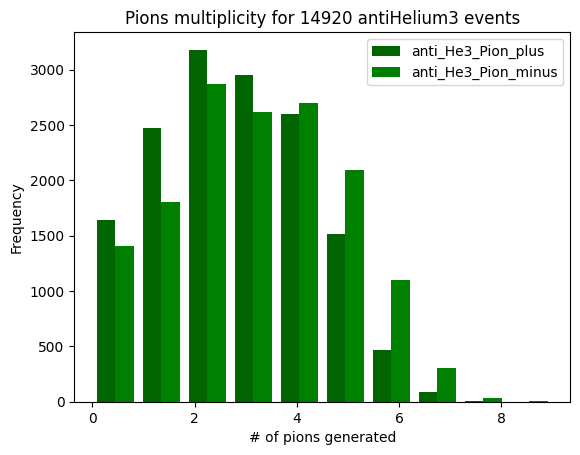

In [6]:

# This is for listing pi-/pi+/pi0 multiplicity

anti_He3_Pion_profile = [N_mu_plus, N_mu_minus]
anti_He3_Pion_label = ['anti_He3_Pion_plus', 'anti_He3_Pion_minus']
anti_He3_Pion_color = ['darkgreen', 'green']


plt.figure(1)
plt.hist(anti_He3_Pion_profile, label = anti_He3_Pion_label, color=anti_He3_Pion_color)

# Add labels and title
plt.xlabel('# of pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(len(event_keys))+ ' antiHelium3 events')

# Show the plot
plt.show()

In [7]:
proton_data = read_data_from_toymodel("/HDD/jiancheng/GRAMS/ToyModelData/2023/anti_proton_daughters_1e7.dat")

Reading data...

Grouping data...
Finished data reading!


In [8]:
if proton_data is not None:
    proton_N_mu_plus = []
    proton_N_mu_minus = []
    try:
        event_keys = list(proton_data.groups.keys())
        # i is eventID
        for i in range(len(event_keys)):
            proton_data_track = proton_data.get_group(event_keys[i])
            proton_data_track = proton_data_track.groupby(['trackID'])
            track_keys = list(proton_data_track.groups.keys())
            mu_plus = 0
            mu_minus = 0
            # j is track ID
            for j in range(len(track_keys)):
                if(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211'):
                    mu_plus = mu_plus + 1
                    # get the particle ID of this track
                    #print("first track of event", event_keys[i], "is", proton_data_track.get_group(track_keys[j]).iloc[0]['particleID'])
                elif(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211'):
                    mu_minus = mu_minus + 1
            proton_N_mu_plus.append(mu_plus)
            proton_N_mu_minus.append(mu_minus)
            toy_model_analysis.display_progress_bar(i+1, len(event_keys))

    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


[##################################################] 100.00% 16524/16524

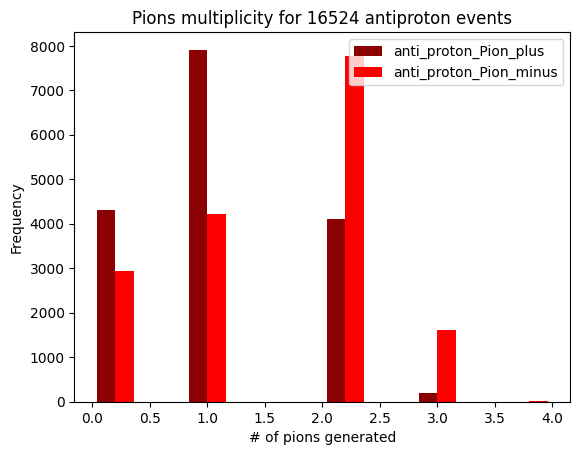

In [10]:

# This is for listing pi-/pi+/pi0 multiplicity

anti_proton_Pion_profile = [proton_N_mu_plus, proton_N_mu_minus]
anti_proton_Pion_label = ['anti_proton_Pion_plus', 'anti_proton_Pion_minus']
anti_proton_Pion_color = ['darkred', 'red']


plt.figure(1)
plt.hist(anti_proton_Pion_profile, label = anti_proton_Pion_label, color=anti_proton_Pion_color)

# Add labels and title
plt.xlabel('# of pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(len(event_keys))+ ' antiproton events')

# Show the plot
plt.show()

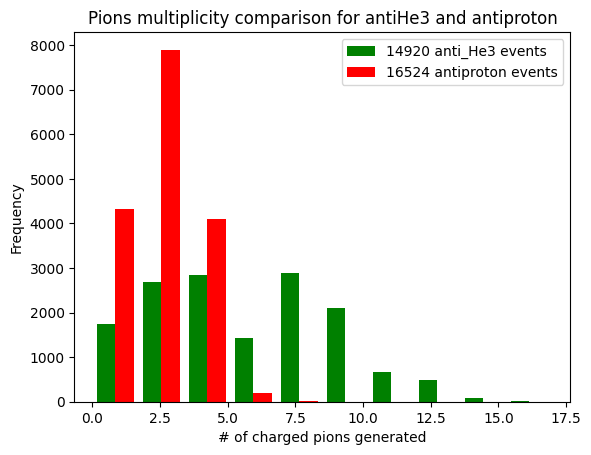

In [13]:
He3bar_charged_pion = np.array(N_mu_minus) + np.array(N_mu_plus)
protonbar_charged_pion = np.array(proton_N_mu_plus) + np.array(proton_N_mu_minus)

Charged_pion_comparison = [He3bar_charged_pion, protonbar_charged_pion]
Charged_pion_label = [f'{len(He3bar_charged_pion)} anti_He3 events', f'{len(protonbar_charged_pion)} antiproton events']
Charged_pion_color = ['green', 'red']

plt.figure(1)
plt.hist(Charged_pion_comparison, label = Charged_pion_label, color=Charged_pion_color)

# Add labels and title
plt.xlabel('# of charged pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity comparison for antiHe3 and antiproton')

# Show the plot
plt.show()